In [3]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# upload Dataset from local drive.
from google.colab import files
uploaded= files.upload()

Saving titanic-data0.csv to titanic-data0.csv


# Data Wrangle 

In [9]:
# load the Dataset 
df=pd.read_csv('titanic-data0.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Introduction about Dataset

#### Passenger ID ----> the number of passenger ticket.
#### Survived -----> this is 2 value 0 & 1 0 reflect not surived & 1 survived
#### Pcalss -----> this is categical value reflect the ticket class from 1 t0 3
#### Name ----> this is a passenger name 
#### Sex ----> this is reflect the passenger gender.
#### Age ----> this is recorded the passenger age.
#### parch --->  number of parents/children
#### Ticket ----> this is reflect the kind of ticket.
#### Fare ----> this is the reflect the ticket price.
#### cabin ---> this is reflect the cabin number for every passenger.
#### Embarked----> port of where passenger embarked (C: Cherbourg, Q: Queenstown, S: Southampton).
#### SibSp----> number of siblings/spouse


'                                       ----------------------------------------------------------------------------------

# * Quesion we could explore

##### what is the main gender survive?
##### what is the main age survived?
##### do the class effect on passenger survived?
#####  do parch effect in surviving?
##### do effect the price in survivng?

In [10]:
# check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# check the null value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### from above some of the column is useless like the cabin column almost of the data is nan so drop this column
##### Age column also have alot of nan data drop this data also because 177 value not accurate to fill it with mean or any statistics 

In [34]:
df_copy=df.copy()
df_copy.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [29]:
df_copy.shape

(891, 12)

In [39]:
df_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
df.shape

(891, 12)

In [41]:
# drop Cabin column from Dataset 
df.drop(['Cabin'], axis=1, inplace=True)
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [43]:
# drop nan Value from Age & Embarked Columns
df.dropna(inplace=True)
df.shape

(712, 11)

In [46]:
#check dataset duplication
df.duplicated().sum()

0

In [47]:
# check the dataset describution
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


##### age column have values less than zero 

In [53]:
for x in df['Age']:
  if x <= 0:
    print('nan')

In [55]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [56]:
# check the number od survived and dead
survive=df['Survived']==1
dead=df['Survived']==0

In [62]:
# number of female 
total_female= df.query("Sex=='female'")['Survived'].count()
total_female

259

In [63]:
#number of male
total_male= df.query("Sex=='male'")['Survived'].count()
total_male

453

In [82]:
# number the survived on ship
survived=survive.sum()
survived

288

In [83]:
# number of the dead on ship
deaded=dead.sum()
deaded

424

In [74]:
# number of female survived 
total_female_survived= df.query("Sex == 'female'")["Survived"]==1
female_survived=total_female_survived.sum()
female_survived


195

In [85]:
# number of male survived
male_survived=survived- female_survived
male_survived

93

In [87]:
# number of female dead
female_dead= total_female - female_survived
female_dead

64

In [88]:
# number of male dead
male_dead= total_male- male_survived
male_dead

360

In [95]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [96]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5])

# (EDA)

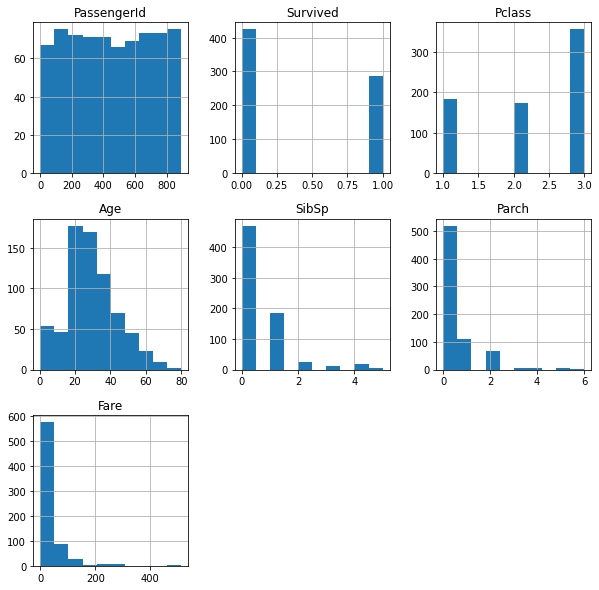

In [99]:
df.hist(figsize=(10,10));

##### from above passenger id data is not effective.
##### the main of  passengers is deaded.
##### te main of  passengers in Class 3.
##### the average of passengers age between 18-40 years.
##### themain of passengers didn't have family.

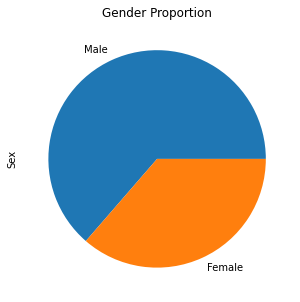

In [105]:
df.Sex.value_counts().plot(kind="pie", labels=['Male','Female'], figsize=(5,5));
plt.title('Gender Proportion');

#### From chart above almost of passengers were male.

In [106]:
# the mean of gender survived.
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by=['Survived'],ascending=False)

,Sex,Survived
0,female,0.752896
1,male,0.205298


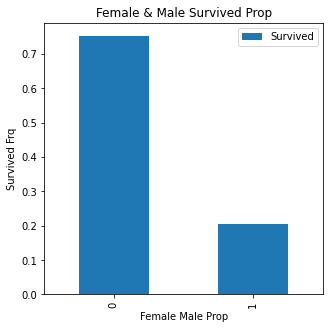

In [126]:
#@title Default title text
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by=['Survived'], ascending=False).plot(kind='bar', figsize=(5,5));
plt.title('Female & Male Survived Prop');
plt.xlabel('Female Male Prop');
plt.ylabel('Survived Frq');

#### from the chart above almost of passengers survived were a female.

In [110]:
df[['Pclass','Survived']].groupby(['Pclass'], as_index= False).mean().sort_values(by=['Survived'], ascending=False)

,Pclass,Survived
0,1,0.652174
1,2,0.479769
2,3,0.239437


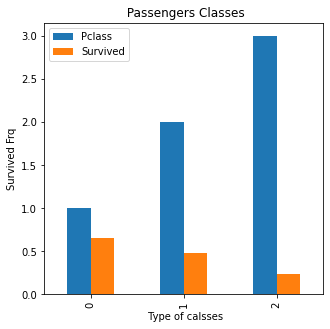

In [112]:
df[['Pclass','Survived']].groupby(['Pclass'], as_index= False).mean().sort_values(by=['Survived'], ascending=False).plot(kind='bar', figsize=(5,5));
plt.title(" Passengers Classes");
plt.xlabel(' Type of calsses');
plt.ylabel('Survived Frq');

#### the graph above reflect the main of passengers dead from class 1 and the minumam dead from class 3,the classes effectivie in survived proportions.

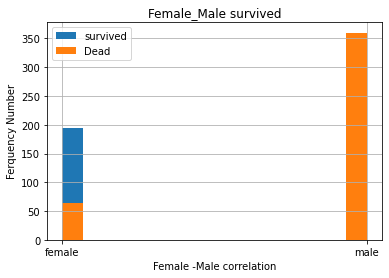

In [125]:
df[survive].Sex.hist(alpha=1, bins=15, label='survived');
df[dead].Sex.hist(alpha=1, bins=15, label='Dead');
plt.title('Female_Male survived');
plt.legend();
plt.xlabel('Female -Male correlation');
plt.ylabel('Ferquency Number');

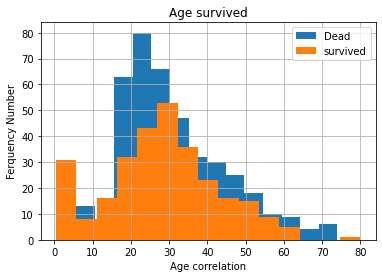

In [129]:
df[dead].Age.hist(alpha=1, bins=15, label='Dead');
df[survive].Age.hist(alpha=1, bins=15, label='survived');
plt.title('Age survived');
plt.legend();
plt.xlabel('Age correlation');
plt.ylabel('Ferquency Number');

#### from the chart above the main age dead between 15-35 years beacuse this the main passengers age . and the main survived from 0-5 years this is mean they were relase kides frist

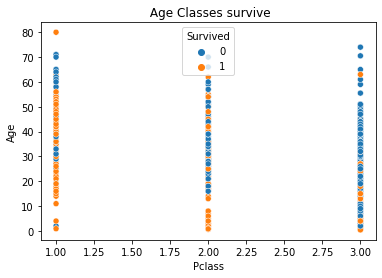

In [133]:
sns.scatterplot(x='Pclass', y='Age', hue='Survived', data= df);
plt.title(' Age Classes survive');

##### the chart above represent the main age survived from every class.

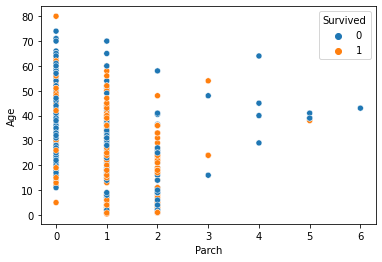

In [139]:
sns.scatterplot(x='Parch', y='Age', hue='Survived', data=df);